# 1. 
# In ‘train.mat,’ you can find 2-D points X=[x1, x2] and their corresponding labels Y=y. 

## load and observe data

(70, 3) (70, 1)


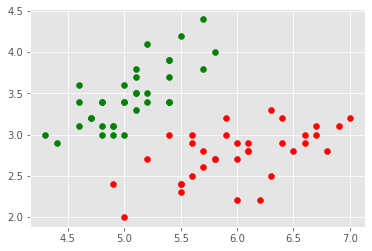

In [1]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
train = scipy.io.loadmat('train.mat') 
train_x = np.concatenate((train['x1'],train['x2']), axis=1)
train_X = PolynomialFeatures(degree=1).fit_transform(train_x)
train_y = train['y']
test = scipy.io.loadmat('test.mat') 
test_x = np.concatenate((test['x1'],test['x2']), axis=1)
test_X = PolynomialFeatures(degree=1).fit_transform(test_x)
test_y = test['y']

print(train_X.shape, train_y.shape)
plt.scatter(train['x1'][:35], train['x2'][:35], c='g')
plt.scatter(train['x1'][35:], train['x2'][35:], c='r')
plt.show()

## Please use logistic regression $ℎ(𝜽) = \frac{1}{1+e^{- \theta^Tx}}$  to find the decision boundary(optimal $𝜽^*$ ) based on ‘train.mat.” 
## Please use a gradient descent method to solve it

[0.28653464] [-1.74841799] [2.98028924]


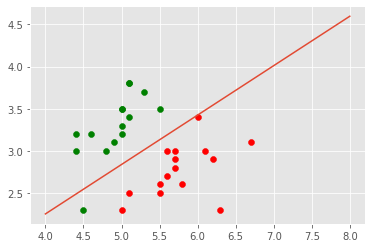

In [2]:
def gradient(x,y,weight):
    theta_d_x = x.dot(weight)                                              
    sig_h = 1/(1 + np.exp(-1*(theta_d_x)))
    return -1*((y-sig_h)*x).sum(axis=0).reshape(-1,1)


def gradient_descent(x, y, gradient, init_weight, learn_rate, n_iter=40000, tolerance=1e-6):
    weight = init_weight
    for _ in range(n_iter):
        diff = -learn_rate * gradient(x, y, weight)
        if np.all(np.abs(diff) <= tolerance):
            break
        weight += diff
    return weight

theta0 = 0.001; theta1 = 0.001; theta2 = 0.001
init_weight = np.array([[theta0], [theta1], [theta2]])
final_weights = gradient_descent(train_X, train_y, gradient, init_weight, 1e-5)
decision_boundary = (np.linspace(4,8,50),-1*(final_weights[1]/final_weights[2])*np.linspace(4,8,50)-(final_weights[0]/final_weights[2]))

print(final_weights[0], final_weights[1], final_weights[2])
plt.plot(decision_boundary[0], decision_boundary[1])
plt.scatter(test['x1'][:15], test['x2'][:15], c='g')
plt.scatter(test['x1'][15:], test['x2'][15:], c='r')
plt.show()

## use a gradient descent method to solve it and report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples)

In [4]:
from sklearn.metrics import accuracy_score
theta_d_x = test_X.dot(final_weights)                                              
pred = 1/(1 + np.exp(-1*(theta_d_x)))
pred = np.round(pred, decimals=0)
print(accuracy_score(test_y, pred))

0.9666666666666667


### check the result of using sklearn

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(train_X,train_y)
print(model.coef_)
print(accuracy_score(test_y,model.predict(test_X)))

[[ 6.36289705e-06 -2.58940281e+00  2.70528217e+00]]
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# 2.
# Download the MNIST dataset using the following example code:
# Please randomly choose 1,000 different handwritten images from either the training or the testing dataset to construct your own dataset, where each digit has 100 data samples.

## 2.1 Use the following code to show 50 images in your own dataset.

In [16]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
# input image dimensions 28x28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


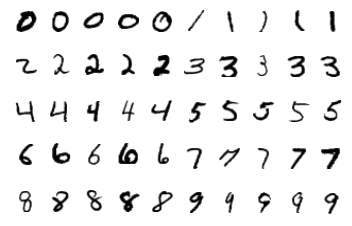

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def gen_1000_pic(x, y):
    for i in range(10): 
        ind = np.where(y==i)
        if i == 0:
            new_X = x[np.random.choice(ind[0], 100)]
        else:
            new_X = np.concatenate((new_X,x[np.random.choice(ind[0],100)]), axis=0)
    return new_X

def print_pic(x):
    amount= 50; lines = 5; columns = 10; number = np.zeros(amount)

    for i in range(amount):
        number[i] = y_test[i]
        # print(number[0])

    fig = plt.figure()

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x[i*20,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])

    plt.show()
    
x_train = gen_1000_pic(x_train, y_train)
print_pic(x_train)

## 2.2. Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues).

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    